##  파산한 은행 데이타집합에서 분기별 은행수를 계산하기


    1. 먼저 데이타 구조를 파악하기

    2. 'Closing Date' 날짜 항목을 datetime 오브젝트로 변기하기

    3. 'Closing Date' 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구하기

    4.  연도별 파산은행 수 구하기

    5. 연도별, 분기별 파산은행 수 구하기

    6. 정보 시각화
    
    
    [도서] Do it 데이타분석을 위한 판다스 입문

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
banks = pd.read_csv('./data/banklist.csv', parse_dates=['Closing Date', 'Updated Date'])
# (1) 먼저 데이타 구조를 파악하기
banks.head()
banks.info()

# (2) Closing Date를 datetime 오브젝트로 변경
#    ㄴ 파일을 읽을 때 datetime으로 변경함

# (3) 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구한다
banks['Closing Year'] = banks['Closing Date'].dt.year
banks['Closing Quarter'] = banks['Closing Date'].dt.quarter
banks.head()


# (4) 연도별 파산은행 수 구하기 # sum() count() size()
#banks.groupby('Closing Year').sum()
#banks.groupby('Closing Year').count()
#banks.groupby('Closing Year').size()

#banks.groupby(banks['Closing Year'],sum()
#banks.groupby(banks['Closing Year'],count()
#banks.groupby(banks['Closing Year'],size()

# (5) 연도별, 분기별 파산은행 수 구하기
closing_year = banks.groupby('Closing Year').size()
closing_year

closing_quarter = banks.groupby(['Closing Year', 'Closing Quarter']).size() # 년도별로 그룹화한 이후에 분기별로 그룹화
closing_quarter
#type(closing_quarter)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


Closing Year  Closing Quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

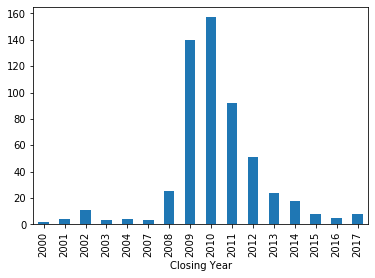

In [25]:
""" 결과를 시각화 ( 간단하게 )"""
#closing_year.plot();
closing_year.plot(kind='bar');

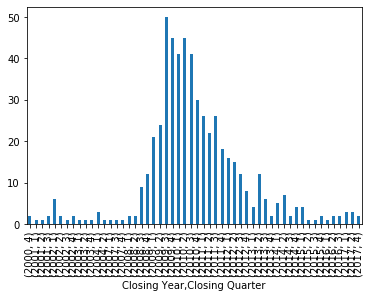

In [26]:
#closing_quarter.plot();
closing_quarter.plot(kind='bar');

<BarContainer object of 54 artists>

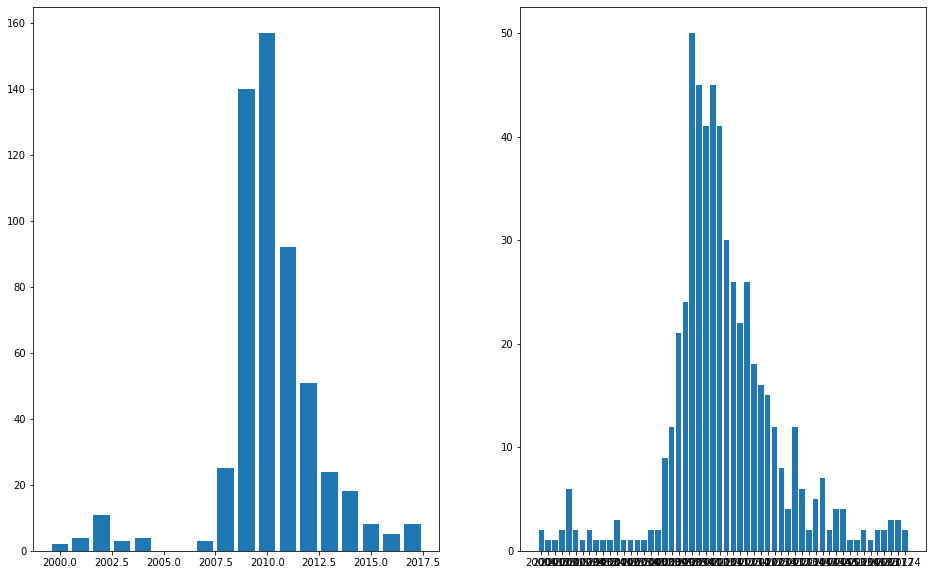

In [63]:
cqi = []
for item in closing_quarter.index:
    cqi.append(str(item[0])+str(item[1]))
cqi

fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
#ax1.plot(closing_year)
ax1.bar(closing_year.index, closing_year.values)
ax2.bar(cqi ,closing_quarter.values)
#ax2.plot(cqi ,closing_quarter)

In [50]:
closing_quarter.index
cqi = []
for item in closing_quarter.index:
    cqi.append(str(item[0])+str(item[1]))
cqi

#ax2.plot(closing_quarter)
#type(closing_quarter.index)
#type(list(closing_quarter.index))
#closing_quarter.index[0]

MultiIndex([(2000, 4),
            (2001, 1),
            (2001, 2),
            (2001, 3),
            (2002, 1),
            (2002, 2),
            (2002, 3),
            (2002, 4),
            (2003, 1),
            (2003, 2),
            (2003, 4),
            (2004, 1),
            (2004, 2),
            (2007, 1),
            (2007, 3),
            (2007, 4),
            (2008, 1),
            (2008, 2),
            (2008, 3),
            (2008, 4),
            (2009, 1),
            (2009, 2),
            (2009, 3),
            (2009, 4),
            (2010, 1),
            (2010, 2),
            (2010, 3),
            (2010, 4),
            (2011, 1),
            (2011, 2),
            (2011, 3),
            (2011, 4),
            (2012, 1),
            (2012, 2),
            (2012, 3),
            (2012, 4),
            (2013, 1),
            (2013, 2),
            (2013, 3),
            (2013, 4),
            (2014, 1),
            (2014, 2),
            (2014, 3),
           

In [55]:
type(closing_quarter)

pandas.core.series.Series

In [60]:
closing_quarter.index

MultiIndex([(2000, 4),
            (2001, 1),
            (2001, 2),
            (2001, 3),
            (2002, 1),
            (2002, 2),
            (2002, 3),
            (2002, 4),
            (2003, 1),
            (2003, 2),
            (2003, 4),
            (2004, 1),
            (2004, 2),
            (2007, 1),
            (2007, 3),
            (2007, 4),
            (2008, 1),
            (2008, 2),
            (2008, 3),
            (2008, 4),
            (2009, 1),
            (2009, 2),
            (2009, 3),
            (2009, 4),
            (2010, 1),
            (2010, 2),
            (2010, 3),
            (2010, 4),
            (2011, 1),
            (2011, 2),
            (2011, 3),
            (2011, 4),
            (2012, 1),
            (2012, 2),
            (2012, 3),
            (2012, 4),
            (2013, 1),
            (2013, 2),
            (2013, 3),
            (2013, 4),
            (2014, 1),
            (2014, 2),
            (2014, 3),
           